<a href="https://colab.research.google.com/github/priya-dalvi/Msc-Project/blob/main/Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Classifer

In [ ]:
# Standard imports
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#categorical encoding using Labelencoder
from sklearn.preprocessing import LabelEncoder
num=LabelEncoder()

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
import graphviz
from sklearn.tree import export_graphviz

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Tourism.csv to Tourism.csv


In [ ]:
import io
data= pd.read_csv(io.BytesIO(uploaded['Tourism.csv']))

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
data

,Timestamp,Full Name,Gender,Age,Occupation,Do you like to travel?,Which Type of Destination will you prefer the most?,Which Type of Mode will you prefer for Travel most?,What is your main interest in selecting a destination?,What are the main challenging problems that you face when choosing a destination?,Do you prefer to use tourist guide service or self-dependent?,"When you plan a tour, what factors becomes your top priority?",What kind of tour would you prefer?,What kind of accommodation do you prefer to stay in?,How do you search for the destination you want to visit?,What are the important factors in choosing your tourism destination?,What would you prioritize if offered the following on tour?,What are the main reasons for your visit?,How frequently you visit tourist places in a year?,What is generally the length of your trip?,Your Family Income Level (per annum):,How much do you spend on a trip on an average in a year ?,How do you book a tour?,Name of destination you wish to visit
0,3/23/2021 13:53:19,Sunanda Dalvi,Female,43,Homemaker,Yes,Domestic,Road,"Nature, Religious sentiment","Language Difficulties, Price",Guide Service,Transportation/Easy route,Group,Hotel,"Newspaper, TV/Radio travel programs","Value for money, Attractive natural and cultur...","Attend festivals and events, Shopping and markets","Rest and relaxation, Visiting relatives and fr...",Once in a Year,3-5 days,Up to 5 lac,Up to ten thousand,"High Street travel agents, Book on arrival",NaN
1,3/23/2021 14:00:06,Baban Dalvi,Male,51,Worker,Yes,Domestic,Road,"Nature, Religious sentiment","Language Difficulties, Price",Guide Service,"Stay facilities., Transportation/Easy route",Depends,Hotel,"Newspaper, TV/Radio travel programs","Comfort and accessibility, Value for money","Attend festivals and events, Visiting local he...","Rest and relaxation, Visiting relatives and fr...",Once in a Year,A week,Up to 5 lac,Up to ten thousand,"High Street travel agents, Book on arrival, Em...",NaN
2,3/23/2021 17:04:16,Priya Dalvi,Female,22,Student,Yes,Domestic,Water,"Adventure, Nature","Quality Service, Price",Guide Service,Transportation/Easy route,Depends,Farmhouse,"Website organized by tourist company, TV/Radio...","Value for money, Entertainment and night life,...","Visiting local heritage site, Joining local ac...","Rest and relaxation, Attending conference semi...",Once in a Year,1-2 days,Up to 5 lac,Up to ten thousand,"Website of travel agents or tour operators, Bo...",Maldives
3,3/23/2021 19:07:25,Sujata,Female,22,Student,Yes,Domestic,Road,"Adventure, Nature","Quality Service, Price",Self-Dependent,Transportation/Easy route,Group,Farmhouse,"Website organized by tourist company, Social m...",Value for money,"Attend festivals and events, Visiting local he...",Rest and relaxation,Once in 6 Months,3-5 days,Up to 5 lac,Up to ten thousand,"Website of travel agents or tour operators, Bo...",Ladakh
4,3/23/2021 19:07:30,Girish,Male,23,Student,Yes,Domestic,Road,"Adventure, Nature","Reliability, Language Difficulties, Price",Self-Dependent,"Highly visiting place., Adventures place",Depends,Outdoor activity center,"Website organized by tourist company, Social m...","Value for money, Entertainment and night life,...","Visiting local heritage site, Joining local ac...","Rest and relaxation, Visiting relatives and fr...",Every Month,Depend on trip,Up to 5 lac,Up to ten thousand,"Online booking agency, Book on arrival, Email ...",Mount abu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,5/18/2021 13:45:29,Pritam Thakur,Male,25,Worker,Yes,Domestic,Road,"Adventure, Nature","Quality Service, Price",Guide Service,Stay facilities.,Depends,Outdoor activity center,"Website organized by tourist company, TV/Radio...","Value for money, Entertainment, Attractive nat...","Attend festivals and events, Visiting local he...","Rest and relaxation, Visiting relatives and fr...",Once in 6 Months,A week,5 lac- 15 lac,Up to ten thousand,"Online boo

In [ ]:
data.columns

Index(['Timestamp', 'Full Name', 'Gender', 'Age', 'Occupation',
       'Do you like to travel?',
       'Which Type of Destination will you prefer the most?',
       'Which Type of Mode will you prefer for Travel most?',
       'What is your main interest in selecting a destination?',
       'What are the main challenging problems that you face when choosing a destination?',
       'Do you prefer to use tourist guide service or self-dependent?',
       'When you plan a tour, what factors becomes your top priority?',
       'What kind of tour would you prefer?',
       'What kind of accommodation do you prefer to stay in?',
       'How do you search for the destination you want to visit?',
       'What are the important factors in choosing  your tourism destination?',
       'What would you prioritize if offered the following on tour?',
       'What are the main reasons for your visit?',
       'How frequently you visit tourist places in a year?',
       'What is generally the length of

In [ ]:
data.drop(['Full Name'], axis = 1,inplace=True)

In [ ]:
data.drop(['Timestamp'], axis = 1,inplace=True)

In [ ]:
data

,Gender,Age,Occupation,Do you like to travel?,Which Type of Destination will you prefer the most?,Which Type of Mode will you prefer for Travel most?,What is your main interest in selecting a destination?,What are the main challenging problems that you face when choosing a destination?,Do you prefer to use tourist guide service or self-dependent?,"When you plan a tour, what factors becomes your top priority?",What kind of tour would you prefer?,What kind of accommodation do you prefer to stay in?,How do you search for the destination you want to visit?,What are the important factors in choosing your tourism destination?,What would you prioritize if offered the following on tour?,What are the main reasons for your visit?,How frequently you visit tourist places in a year?,What is generally the length of your trip?,Your Family Income Level (per annum):,How much do you spend on a trip on an average in a year ?,How do you book a tour?,Name of destination you wish to visit
0,Female,43,Homemaker,Yes,Domestic,Road,"Nature, Religious sentiment","Language Difficulties, Price",Guide Service,Transportation/Easy route,Group,Hotel,"Newspaper, TV/Radio travel programs","Value for money, Attractive natural and cultur...","Attend festivals and events, Shopping and markets","Rest and relaxation, Visiting relatives and fr...",Once in a Year,3-5 days,Up to 5 lac,Up to ten thousand,"High Street travel agents, Book on arrival",NaN
1,Male,51,Worker,Yes,Domestic,Road,"Nature, Religious sentiment","Language Difficulties, Price",Guide Service,"Stay facilities., Transportation/Easy route",Depends,Hotel,"Newspaper, TV/Radio travel programs","Comfort and accessibility, Value for money","Attend festivals and events, Visiting local he...","Rest and relaxation, Visiting relatives and fr...",Once in a Year,A week,Up to 5 lac,Up to ten thousand,"High Street travel agents, Book on arrival, Em...",NaN
2,Female,22,Student,Yes,Domestic,Water,"Adventure, Nature","Quality Service, Price",Guide Service,Transportation/Easy route,Depends,Farmhouse,"Website organized by tourist company, TV/Radio...","Value for money, Entertainment and night life,...","Visiting local heritage site, Joining local ac...","Rest and relaxation, Attending conference semi...",Once in a Year,1-2 days,Up to 5 lac,Up to ten thousand,"Website of travel agents or tour operators, Bo...",Maldives
3,Female,22,Student,Yes,Domestic,Road,"Adventure, Nature","Quality Service, Price",Self-Dependent,Transportation/Easy route,Group,Farmhouse,"Website organized by tourist company, Social m...",Value for money,"Attend festivals and events, Visiting local he...",Rest and relaxation,Once in 6 Months,3-5 days,Up to 5 lac,Up to ten thousand,"Website of travel agents or tour operators, Bo...",Ladakh
4,Male,23,Student,Yes,Domestic,Road,"Adventure, Nature","Reliability, Language Difficulties, Price",Self-Dependent,"Highly visiting place., Adventures place",Depends,Outdoor activity center,"Website organized by tourist company, Social m...","Value for money, Entertainment and night life,...","Visiting local heritage site, Joining local ac...","Rest and relaxation, Visiting relatives and fr...",Every Month,Depend on trip,Up to 5 lac,Up to ten thousand,"Online booking agency, Book on arrival, Email ...",Mount abu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,Male,25,Worker,Yes,Domestic,Road,"Adventure, Nature","Quality Service, Price",Guide Service,Stay facilities.,Depends,Outdoor activity center,"Website organized by tourist company, TV/Radio...","Value for money, Entertainment, Attractive nat...","Attend festivals and events, Visiting local he...","Rest and relaxation, Visiting relatives and fr...",Once in 6 Months,A week,5 lac- 15 lac,Up to ten thousand,"Online booking agency, Book on arrival, Email ...",Himachal
292,Female,27,Homemaker,Yes,Domestic,Road,"Nature, Religious sentiment","Quality Service, Language Difficulties",Guide Service,"Stay facilities., Transportati

In [ ]:
data.rename(columns={'Which Type of Destination will you prefer the most?':'Most preferred type of Destination',
                  'Which Type of Mode will you prefer for Travel most?':'Most preferred type of Mode',
                   'What is your main interest in selecting a destination?':'Main interest in selecting a destination',
                   'What are the main challenging problems that you face when choosing a destination?':'Challenging problems faced when choosing a destination',
                   'Do you prefer to use tourist guide service or self-dependent?':'Preferred to use tourist guide service or self-dependent',
                   'When you plan a tour, what factors becomes your top priority?':'Top priority factors for planning a tour',
                   'What kind of tour would you prefer?':'Preferred kind of tour Guide service OR Self-dependent',
                   'What kind of accommodation do you prefer to stay in?':'Preferred type Of accomodation to stay in',
                   'How do you search for the destination you want to visit?':'Preferred type of way to search destination to visit',
                   'What are the important factors in choosing your tourism destination?':'Important factors in choosing tourism destination',
                   'What would you prioritize if offered the following on tour?':'priority if offered the following on tour',
                   'What are the main reasons for your visit?':'Main reasons for visit',
                   'How frequently you visit tourist places in a year?':'Frequency to visit tourist places in a year',
                   'What is generally the length of your trip?':'General length of trip',
                   'Your Family Income Level (per annum):':'Family Income Level (per annum):',
                   'How much do you spend on a trip on an average in a year ?':'Amount spent on a trip on an average in a year',
                   'How do you book a tour?':'Preferred_medium',
                   'Name of destination you wish to visit':'Destination'},inplace=True)

In [ ]:
data.rename(columns={'What are the important factors in choosing  your tourism destination?':'Important factors in choosing  your tourism destination',
                    'Preferred to use tourist guide service or self-dependent?':'Preferred to use tourist guide service or self-dependent',
                    'Name of destination you wish to visit':'Destination'},inplace=True)

In [ ]:
data.columns

Index(['Gender', 'Age', 'Occupation', 'Do you like to travel?',
       'Most preferred type of Destination', 'Most preferred type of Mode',
       'Main interest in selecting a destination',
       'Challenging problems faced when choosing a destination',
       'Preferred to use tourist guide service or self-dependent',
       'Top priority factors for planning a tour',
       'Preferred kind of tour Guide service OR Self-dependent',
       'Preferred type Of accomodation to stay in',
       'Preferred type of way to search destination to visit',
       'Important factors in choosing  your tourism destination',
       'priority if offered the following on tour', 'Main reasons for visit',
       'Frequency to visit tourist places in a year', 'General length of trip',
       'Family Income Level (per annum):',
       'Amount spent on a trip on an average in a year', 'Preferred_medium',
       'Name of destination you wish to visit '],
      dtype='object')

In [ ]:
data.rename(columns={'Name of destination you wish to visit ':'Destination Name'},inplace=True)

In [ ]:
data.drop(['Destination Name'], axis = 1,inplace=True)

In [ ]:
data.columns

Index(['Gender', 'Age', 'Occupation', 'Do you like to travel?',
       'Most preferred type of Destination', 'Most preferred type of Mode',
       'Main interest in selecting a destination',
       'Challenging problems faced when choosing a destination',
       'Preferred to use tourist guide service or self-dependent',
       'Top priority factors for planning a tour',
       'Preferred kind of tour Guide service OR Self-dependent',
       'Preferred type Of accomodation to stay in',
       'Preferred type of way to search destination to visit',
       'Important factors in choosing  your tourism destination',
       'priority if offered the following on tour', 'Main reasons for visit',
       'Frequency to visit tourist places in a year', 'General length of trip',
       'Family Income Level (per annum):',
       'Amount spent on a trip on an average in a year', 'Preferred_medium'],
      dtype='object')

In [ ]:
data.dtypes

Gender                                                      object
Age                                                          int64
Occupation                                                  object
Do you like to travel?                                      object
Most preferred type of Destination                          object
Most preferred type of Mode                                 object
Main interest in selecting a destination                    object
Challenging problems faced when choosing a destination      object
Preferred to use tourist guide service or self-dependent    object
Top priority factors for planning a tour                    object
Preferred kind of tour Guide service OR Self-dependent      object
Preferred type Of accomodation to stay in                   object
Preferred type of way to search destination to visit        object
Important factors in choosing  your tourism destination     object
priority if offered the following on tour                   ob

In [ ]:
#Using labelEncoder
data['Age']=num.fit_transform(data['Age']).astype('int')
data['Gender']=num.fit_transform(data['Gender']).astype('int')
data['Do you like to travel?']=num.fit_transform(data['Do you like to travel?']).astype('int')
data['Occupation']=num.fit_transform(data['Occupation']).astype('int')
data['Most preferred type of Destination']=num.fit_transform(data['Most preferred type of Destination']).astype('int')
data['Most preferred type of Mode']=num.fit_transform(data['Most preferred type of Mode']).astype('int')
data['Main interest in selecting a destination']=num.fit_transform(data['Main interest in selecting a destination']).astype('int')
data['Challenging problems faced when choosing a destination']=num.fit_transform(data['Challenging problems faced when choosing a destination']).astype('int')
data['Preferred to use tourist guide service or self-dependent']=num.fit_transform(data['Preferred to use tourist guide service or self-dependent']).astype('int')
data['Top priority factors for planning a tour']=num.fit_transform(data['Top priority factors for planning a tour']).astype('int')
data['Preferred kind of tour Guide service OR Self-dependent']=num.fit_transform(data['Preferred kind of tour Guide service OR Self-dependent']).astype('int')
data['Preferred type Of accomodation to stay in']=num.fit_transform(data['Preferred type Of accomodation to stay in']).astype('int')
data['Preferred type of way to search destination to visit']=num.fit_transform(data['Preferred type of way to search destination to visit']).astype('int')
data['Important factors in choosing  your tourism destination']=num.fit_transform(data['Important factors in choosing  your tourism destination']).astype('int')
data['priority if offered the following on tour']=num.fit_transform(data['priority if offered the following on tour']).astype('int')
data['Main reasons for visit']=num.fit_transform(data['Main reasons for visit']).astype('int')
data['Frequency to visit tourist places in a year']=num.fit_transform(data['Frequency to visit tourist places in a year']).astype('int')
data['General length of trip']=num.fit_transform(data['General length of trip']).astype('int')
data['Family Income Level (per annum):']=num.fit_transform(data['Family Income Level (per annum):']).astype('int')
data['Amount spent on a trip on an average in a year']=num.fit_transform(data['Amount spent on a trip on an average in a year']).astype('int')
data.sample(5)

,Gender,Age,Occupation,Do you like to travel?,Most preferred type of Destination,Most preferred type of Mode,Main interest in selecting a destination,Challenging problems faced when choosing a destination,Preferred to use tourist guide service or self-dependent,Top priority factors for planning a tour,Preferred kind of tour Guide service OR Self-dependent,Preferred type Of accomodation to stay in,Preferred type of way to search destination to visit,Important factors in choosing your tourism destination,priority if offered the following on tour,Main reasons for visit,Frequency to visit tourist places in a year,General length of trip,Family Income Level (per annum):,Amount spent on a trip on an average in a year,Preferred_medium
101,1,5,2,1,0,1,6,4,0,7,1,1,26,15,1,13,1,1,3,2,"Online booking agency, Book on arrival, Email ..."
266,1,12,3,1,1,0,5,4,0,2,0,2,26,8,12,12,1,1,2,3,"Online booking agency, Book on arrival, Email ..."
238,0,8,2,1,1,0,5,6,0,2,1,2,26,15,2,13,1,3,2,2,"Website of travel agents or tour operators, On..."
40,1,10,3,1,0,1,13,3,1,6,2,2,10,22,0,21,2,0,3,2,Online booking agency
19,0,7,2,1,0,1,5,11,0,4,1,1,24,24,7,10,1,3,3,2,Website of travel agents or tour operators


In [ ]:
dummies = pd.get_dummies(data[["Preferred_medium"]])
dummies

,Preferred_medium_Book on arrival,"Preferred_medium_Book on arrival, Email or phone to individual accommodation",Preferred_medium_By self,Preferred_medium_Email or phone to individual accommodation,Preferred_medium_High Street travel agents,"Preferred_medium_High Street travel agents, Book on arrival","Preferred_medium_High Street travel agents, Book on arrival, Email or phone to individual accommodation","Preferred_medium_High Street travel agents, Email or phone to individual accommodation","Preferred_medium_High Street travel agents, Online booking agency","Preferred_medium_High Street travel agents, Online booking agency, Book on arrival","Preferred_medium_High Street travel agents, Online booking agency, Book on arrival, Email or phone to individual accommodation","Preferred_medium_High Street travel agents, Online booking agency, Email or phone to individual accommodation","Preferred_medium_High Street travel agents, Website of travel agents or tour operators, Book on arrival","Preferred_medium_High Street travel agents, Website of travel agents or tour operators, Email or phone to individual accommodation","Preferred_medium_High Street travel agents, Website of travel agents or tour operators, Online booking agency","Preferred_medium_High Street travel agents, Website of travel agents or tour operators, Online booking agency, Book on arrival, Email or phone to individual accommodation","Preferred_medium_High Street travel agents, Website of travel agents or tour operators, Online booking agency, Email or phone to individual accommodation",Preferred_medium_Online booking agency,"Preferred_medium_Online booking agency, Book on arrival","Preferred_medium_Online booking agency, Book on arrival, Email or phone to individual accommodation","Preferred_medium_Online booking agency, Email or phone to individual accommodation",Preferred_medium_Website of travel agents or tour operators,"Preferred_medium_Website of travel agents or tour operators, Book on arrival","Preferred_medium_Website of travel agents or tour operators, Book on arrival, Email or phone to individual accommodation","Preferred_medium_Website of travel agents or tour operators, Email or phone to individual accommodation","Preferred_medium_Website of travel agents or tour operators, Online booking agency","Preferred_medium_Website of travel agents or tour operators, Online booking agency, Book on arrival","Preferred_medium_Website of travel agents or tour operators, Online booking agency, Book on arrival, Email or phone to individual accommodation","Preferred_medium_Website of travel agents or tour operators, Online booking agency, Email or phone to individual accommodation"
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
292,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
293,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
294,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
merge = pd.concat([data,dummies],axis='columns')
merge

,Gender,Age,Occupation,Do you like to travel?,Most preferred type of Destination,Most preferred type of Mode,Main interest in selecting a destination,Challenging problems faced when choosing a destination,Preferred to use tourist guide service or self-dependent,Top priority factors for planning a tour,Preferred kind of tour Guide service OR Self-dependent,Preferred type Of accomodation to stay in,Preferred type of way to search destination to visit,Important factors in choosing your tourism destination,priority if offered the following on tour,Main reasons for visit,Frequency to visit tourist places in a year,General length of trip,Family Income Level (per annum):,Amount spent on a trip on an average in a year,Preferred_medium,Preferred_medium_Book on arrival,"Preferred_medium_Book on arrival, Email or phone to individual accommodation",Preferred_medium_By self,Preferred_medium_Email or phone to individual accommodation,Preferred_medium_High Street travel agents,"Preferred_medium_High Street travel agents, Book on arrival","Preferred_medium_High Street travel agents, Book on arrival, Email or phone to individual accommodation","Preferred_medium_High Street travel agents, Email or phone to individual accommodation","Preferred_medium_High Street travel agents, Online booking agency","Preferred_medium_High Street travel agents, Online booking agency, Book on arrival","Preferred_medium_High Street travel agents, Online booking agency, Book on arrival, Email or phone to individual accommodation","Preferred_medium_High Street travel agents, Online booking agency, Email or phone to individual accommodation","Preferred_medium_High Street travel agents, Website of travel agents or tour operators, Book on arrival","Preferred_medium_High Street travel agents, Website of travel agents or tour operators, Email or phone to individual accommodation","Preferred_medium_High Street travel agents, Website of travel agents or tour operators, Online booking agency","Preferred_medium_High Street travel agents, Website of travel agents or tour operators, Online booking agency, Book on arrival, Email or phone to individual accommodation","Preferred_medium_High Street travel agents, Website of travel agents or tour operators, Online booking agency, Email or phone to individual accommodation",Preferred_medium_Online booking agency,"Preferred_medium_Online booking agency, Book on arrival","Preferred_medium_Online booking agency, Book on arrival, Email or phone to individual accommodation","Preferred_medium_Online booking agency, Email or phone to individual accommodation",Preferred_medium_Website of travel agents or tour operators,"Preferred_medium_Website of travel agents or tour operators, Book on arrival","Preferred_medium_Website of travel agents or tour operators, Book on arrival, Email or phone to individual accommodation","Preferred_medium_Website of travel agents or tour operators, Email or phone to individual accommodation","Preferred_medium_Website of travel agents or tour operators, Online booking agency","Preferred_medium_Website of travel agents or tour operators, Online booking agency, Book on arrival","Preferred_medium_Website of travel agents or tour operators, Online booking agency, Book on arrival, Email or phone to individual accommodation","Preferred_medium_Website of travel agents or tour operators, Online booking agency, Email or phone to individual accommodation"
0,0,25,0,1,0,1,13,1,0,6,1,1,8,26,3,12,2,1,3,2,"High Street travel agents, Book on arrival",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,31,3,1,0,1,13,1,0,4,0,1,8,9,4,12,2,3,3,2,"High Street travel agents, Book on arrival, Em...",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,7,2,1,0,2,5,6,0,6,0,0,26,31,12,6,2,0,3,2,"Website of travel agents or tour operators, Bo...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,7,2,1,0,1,5,6,1,6,1,0,24,25,5,5,1,1,3,2,"Website of travel agents or tour operators, Bo...",0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
final = merge.drop(['Preferred_medium'],axis='columns')
final

,Gender,Age,Occupation,Do you like to travel?,Most preferred type of Destination,Most preferred type of Mode,Main interest in selecting a destination,Challenging problems faced when choosing a destination,Preferred to use tourist guide service or self-dependent,Top priority factors for planning a tour,Preferred kind of tour Guide service OR Self-dependent,Preferred type Of accomodation to stay in,Preferred type of way to search destination to visit,Important factors in choosing your tourism destination,priority if offered the following on tour,Main reasons for visit,Frequency to visit tourist places in a year,General length of trip,Family Income Level (per annum):,Amount spent on a trip on an average in a year,Preferred_medium_Book on arrival,"Preferred_medium_Book on arrival, Email or phone to individual accommodation",Preferred_medium_By self,Preferred_medium_Email or phone to individual accommodation,Preferred_medium_High Street travel agents,"Preferred_medium_High Street travel agents, Book on arrival","Preferred_medium_High Street travel agents, Book on arrival, Email or phone to individual accommodation","Preferred_medium_High Street travel agents, Email or phone to individual accommodation","Preferred_medium_High Street travel agents, Online booking agency","Preferred_medium_High Street travel agents, Online booking agency, Book on arrival","Preferred_medium_High Street travel agents, Online booking agency, Book on arrival, Email or phone to individual accommodation","Preferred_medium_High Street travel agents, Online booking agency, Email or phone to individual accommodation","Preferred_medium_High Street travel agents, Website of travel agents or tour operators, Book on arrival","Preferred_medium_High Street travel agents, Website of travel agents or tour operators, Email or phone to individual accommodation","Preferred_medium_High Street travel agents, Website of travel agents or tour operators, Online booking agency","Preferred_medium_High Street travel agents, Website of travel agents or tour operators, Online booking agency, Book on arrival, Email or phone to individual accommodation","Preferred_medium_High Street travel agents, Website of travel agents or tour operators, Online booking agency, Email or phone to individual accommodation",Preferred_medium_Online booking agency,"Preferred_medium_Online booking agency, Book on arrival","Preferred_medium_Online booking agency, Book on arrival, Email or phone to individual accommodation","Preferred_medium_Online booking agency, Email or phone to individual accommodation",Preferred_medium_Website of travel agents or tour operators,"Preferred_medium_Website of travel agents or tour operators, Book on arrival","Preferred_medium_Website of travel agents or tour operators, Book on arrival, Email or phone to individual accommodation","Preferred_medium_Website of travel agents or tour operators, Email or phone to individual accommodation","Preferred_medium_Website of travel agents or tour operators, Online booking agency","Preferred_medium_Website of travel agents or tour operators, Online booking agency, Book on arrival","Preferred_medium_Website of travel agents or tour operators, Online booking agency, Book on arrival, Email or phone to individual accommodation","Preferred_medium_Website of travel agents or tour operators, Online booking agency, Email or phone to individual accommodation"
0,0,25,0,1,0,1,13,1,0,6,1,1,8,26,3,12,2,1,3,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,31,3,1,0,1,13,1,0,4,0,1,8,9,4,12,2,3,3,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,7,2,1,0,2,5,6,0,6,0,0,26,31,12,6,2,0,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,7,2,1,0,1,5,6,1,6,1,0,24,25,5,5,1,1,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,8,2,1,0,1,5,13,1,1,0,2,24,31,12,18,0,4,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
final.dtypes

Gender                                                                                                                                                                        int64
Age                                                                                                                                                                           int64
Occupation                                                                                                                                                                    int64
Do you like to travel?                                                                                                                                                        int64
Most preferred type of Destination                                                                                                                                            int64
Most preferred type of Mode                                                                         

In [ ]:
X = final.drop('Preferred_medium_Online booking agency', axis=1)
y =final['Preferred_medium_Online booking agency']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((236, 48), (60, 48), (236,), (60,))

In [ ]:
#Using DecisionTreeClassifier
dct=DecisionTreeClassifier(random_state=42)

In [ ]:
dct.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y_preds=dct.predict(X_test)

In [ ]:
dct.score(X_test, y_test)*100

93.33333333333333

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        57
           1       0.33      0.33      0.33         3

    accuracy                           0.93        60
   macro avg       0.65      0.65      0.65        60
weighted avg       0.93      0.93      0.93        60



In [ ]:
cm = confusion_matrix(y_test, y_preds)
cm

array([[55,  2],
       [ 2,  1]])

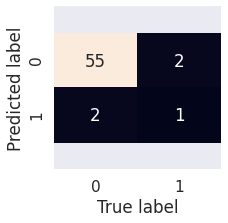

In [ ]:
sns.set(font_scale=1.4)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

In [ ]:
accuracy_score(y_test, y_preds)*100

93.33333333333333

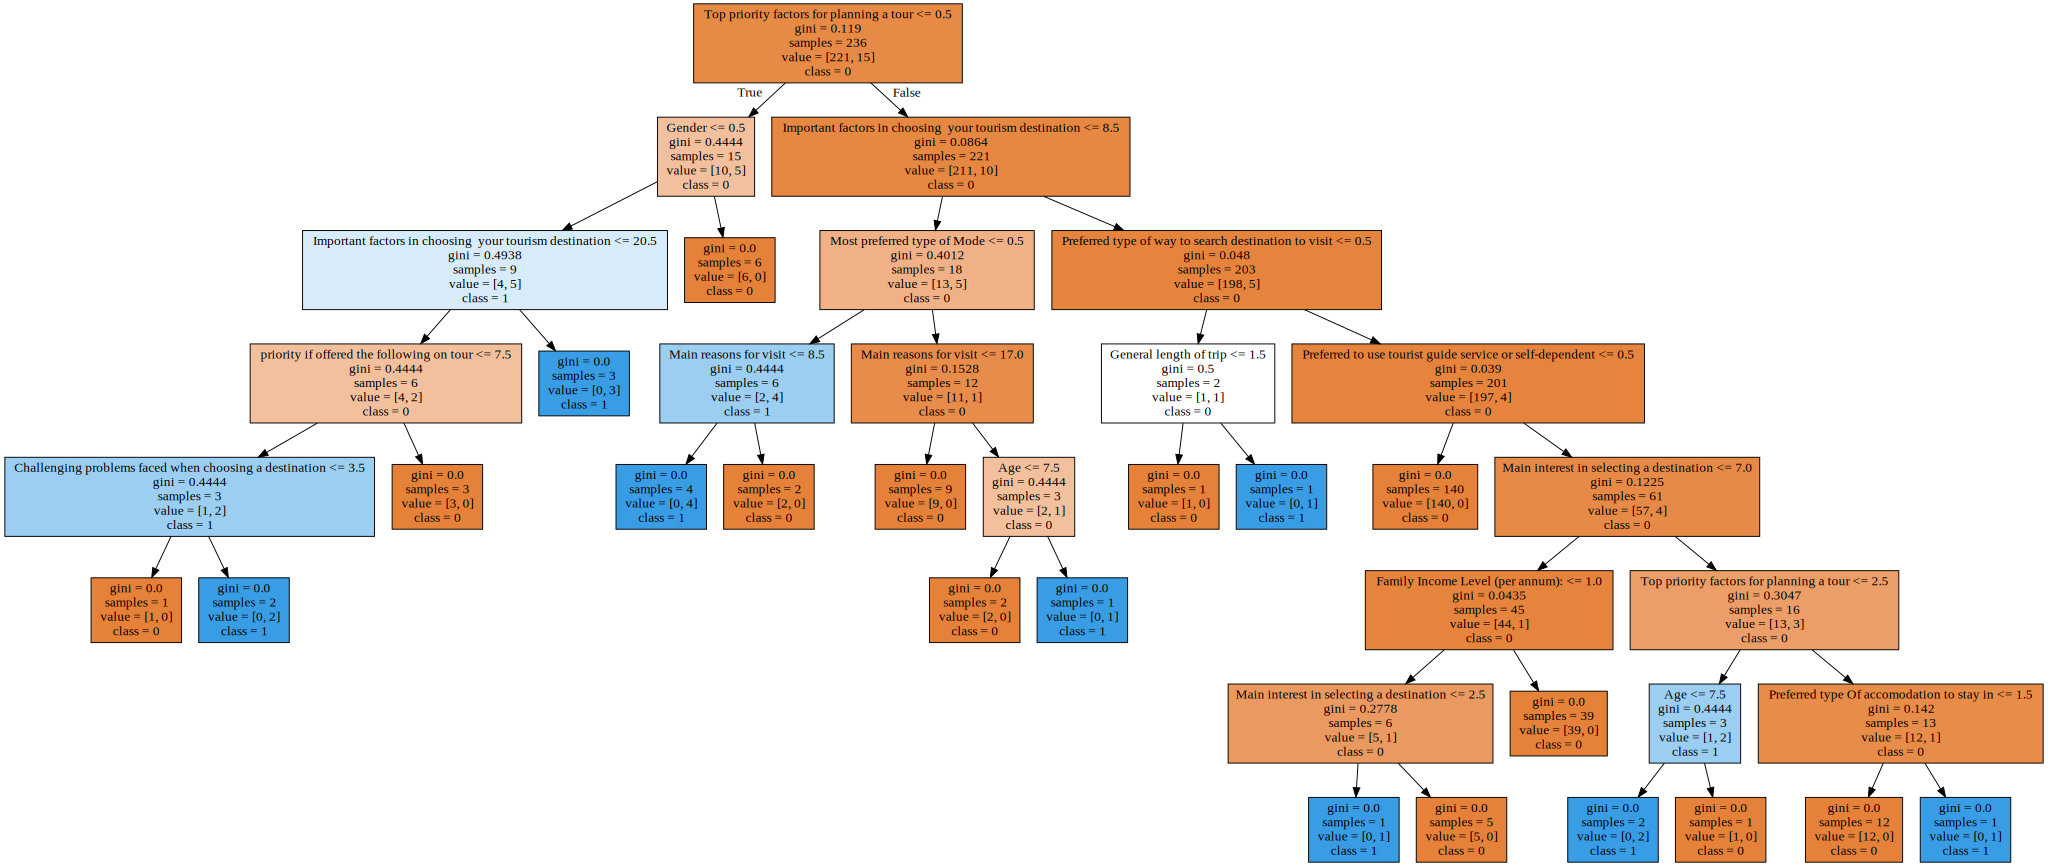

In [ ]:
dot_data = tree.export_graphviz(dct,feature_names = X_train.columns,class_names=["0","1"], filled=True, precision=4)
graph = graphviz.Source(dot_data, format="png") 
graph

# Random Forest classifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=100)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_preds = rfc.predict(X_test)


In [ ]:
rfc.score(X_train, y_train)*100

100.0

In [ ]:
rfc.score(X_test, y_test)*100

95.0

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        57
           1       0.00      0.00      0.00         3

    accuracy                           0.95        60
   macro avg       0.47      0.50      0.49        60
weighted avg       0.90      0.95      0.93        60



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy_score(y_test, y_preds)*100

95.0

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logr=LogisticRegression(C=0.01,max_iter=1000,random_state=42)

In [ ]:
logr.fit(X_train,y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predictions=logr.predict(X_test)

In [ ]:
accuracy_score(y_test, y_preds)*100

93.33333333333333

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        57
           1       0.33      0.33      0.33         3

    accuracy                           0.93        60
   macro avg       0.65      0.65      0.65        60
weighted avg       0.93      0.93      0.93        60



In [ ]:
cm = confusion_matrix(y_test, y_preds)
cm

array([[55,  2],
       [ 2,  1]])

# SVM


In [ ]:
print(len(X_train))
print(len(X_test))

236
60


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='linear')

In [ ]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
percentage = model.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        57
           1       0.33      0.33      0.33         3

    accuracy                           0.93        60
   macro avg       0.65      0.65      0.65        60
weighted avg       0.93      0.93      0.93        60



In [ ]:
from sklearn.metrics import confusion_matrix
res = confusion_matrix(y_test, predictions)
print("Confusion Matrix")
print(res)
print(f"Test Set: {len(X_test)}")
print(f"Accuracy = {percentage*100} %")

Confusion Matrix
[[57  0]
 [ 3  0]]
Test Set: 60
Accuracy = 95.0 %
